
# <div style="text-align: center; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1;border-radius:5px">EDA (Exploratory Data Analysis) Retail Store </div>

![LOGO](./assets/logo.png)

* This in a analysis of certain chinese retail seller who has a lot of beautiful things... 

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">About Dataset</div>

Dataset contains 28 features, each are:

* 1.<b> Codigo de Centro </b>: code name of the store.
* 2.<b> Sucursal </b>: name of the store.
* 3.<b> Estado </b>: name of the store residence's state.
* 4.<b> Latitud/Longitud </b>: location of the store.
* 5.<b> Layout DWG </b>: X if it has layout in DWG format.
* 6.<b> Layout PDF </b>: X if it has layout in PDF format.
* <b> 7. Layout Firmado </b>: X if was approved.
* <b> 8. Proyecto Ejecutivo DWG</b>: X if it has masterplan in DWG format.
* <b> 9. Proyecto Ejecutivo PDF</b>: X if it has masterplan in PDF format.
* <b> 10. Info Previa </b>: X if it has previous information.
* <b> 11. Memoria Descriptiva </b>: X if it has descriptive memory. 
* <b> 12. Render </b>: X if it has renders.
* <b> 13. Modificaciones </b>: X if it has modifications.
* <b> 14. Aforo </b>: X if it has analysis of occupancy.
* <b> 15. Sanitario </b>: X if it has bathroom.
* <b> 16. M2 Totales </b>: Total square meters.
* <b> 17. Bodega </b>: Total square meters.
* <b> 18. Piso Venta </b>: Total square meters.
* <b> 19. Superficie sin uso </b>: Total square meters.
* <b> 20. Perimetros </b>: Number of shelfs.
* <b> 21. Gondolas Dobles </b>: Number of double shelfs.
* <b> 22. Gondolas Triples </b>: Number of triple shelfs.
* <b> 23. Gondolas Cuadruple </b>: Number of cuadruple shelfs.
* <b> 24. Cajas </b>: Number of counters.
* <b> 25. Acceso </b>: Acces Length .
* <b> 26. Niveles </b>: Number of Levels.
* <b> 27. Constructora </b>: Builder.
* <b> 28. Estatus </b>: Status Store.

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">Notebook Milestones</div>

Milestones of the notebook is to:

1. Explore <b> every feature </b> in the dataset.

2. <b> Stores Requirements Analysis. </b>

3. <b> Stores Size Analysis. </b>

4. <b> Stores Forniture Analysis. </b>

5. <b> Stores Location Analysis. </b>

6. <b> Stores Sales Analysis (2022). </b>


# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">Table of Contents</div>

* [1. Import Libraries](#1)
* [2. Univariate Analysis](#2)
* [3. Sales Year Analysis (2021)](#3)
* [4. Prediction Sales](#4)

<a id="1"></a>
# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">1. Import Libraries</div>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
from scipy import stats
from pathlib import Path

# Styling
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import folium

%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">1.1. Import Datasaet</div>

In [2]:
# Reading dataset
df = pd.read_excel('./assets/caracteristicas_tiendas.xlsx')
# Head
df.head(3)

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
0,CEN001,ARAGON,Mexico State,"19.532433759686956, -99.026110761917",X,X,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,142.23,11.04,140.41,2.12,31.0,12,12,0,2,7.46,1,OTROS,Abierta
1,CEN002,GALERIAS COAPA,Mexico City,"19.303008152499295, -99.123170688672",X,X,X,X,X,X,NaN,NaN,NaN,NaN,NaN,147.42,6.07,146.12,1.51,31.0,1,4,0,3,7.59,1,CODESA,Abierta
2,CEN003,MADERO CENTRO,Mexico City,"19.43417600295482, -99.14058301565697",X,X,NaN,X,X,NaN,NaN,NaN,NaN,NaN,X,225.49,17.51,198.36,9.62,66.0,6,1,0,4,4.72,1,CODESA,Abierta


In [3]:
# Tail
df.tail(3)

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
233,CEN234,MITHIKA,Mexico City,"19.359175586951622, -99.16937428867156",X,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,230.29,18.78,195.97,15.68,30.0,12,1,0,3,5.89,1,OTROS,Proxima Apertura
234,CEN235,FUNO CAMBIO 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Proxima Apertura
235,CEN236,FUNO CAMBIO 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Proxima Apertura


# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">1.2. Analyzing Dataset</div>

In [4]:
# Printing shape
print('The shape of the dataframe has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The shape of the dataframe has 236 rows and 28 columns.


In [5]:
# Describing dataframe
df.describe()

,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,235.000000,236.000000
mean,291.477331,35.938559,230.765127,23.300381,42.540551,10.978814,4.716102,0.508475,2.991525,5.803277,0.961864
std,183.515142,49.127702,135.325264,36.340628,24.134995,9.023585,5.366555,1.520055,1.386843,2.892241,0.473362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.022500,12.282500,163.705000,3.455000,31.000000,3.000000,0.000000,0.000000,3.000000,4.535000,1.000000
50%,301.970000,22.600000,243.550000,14.785000,44.000000,10.000000,3.000000,0.000000,3.000000,6.300000,1.000000
75%,385.145000,36.815000,307.390000,23.127500,56.000000,16.000000,7.000000,0.000000,4.000000,7.350000,1.000000
max,951.710000,339.400000,683.120000,244.570000,132.000000,42.000000,33.000000,9.000000,6.000000,14.000000,3.000000


In [6]:
# Printing feature types
df.dtypes

Codigo de Centro           object
Sucursal                   object
Estado                     object
Latitud/Longitud           object
Layout DWG                 object
Layout PDF                 object
Layout Firmado             object
Proyecto Ejecutivo DWG     object
Proyecto Ejecutivo PDF     object
Info Previa                object
Memoria Descriptiva        object
Render                     object
Modificaciones             object
Aforo                      object
Sanitario                  object
M2 Totales                float64
Bodega                    float64
Piso Venta                float64
Superficie sin uso        float64
Perimetros                float64
Gondolas Dobles             int64
Gondolas Triples            int64
Gondola Cuadruple           int64
Cajas                       int64
Acceso                    float64
Niveles                     int64
Constructora               object
Estatus                    object
dtype: object

In [7]:
# Printing number of categorical and numerical features
print(df.dtypes.value_counts())

object     17
float64     6
int64       5
dtype: int64


<b>We have 17 categorical features and 11 numerical features.</b>

<b>Categorical:</b>

- Codigo de Centro, Sucursal, Estado, Latitud/Longitud, Layout DWG, Layout PDF, Layout Firmado,         Proyecto Ejecutivo DWG, Proyecto Ejecutivo PDF, Info Previa, Memoria Descriptiva, Render,      Modificaciones, Aforo, Sanitario, Constructora, Estatus 

<b>Numerical:</b>

- M2 Totales, Bodega, Piso Venta, Superficie sin uso, Perimetros, Gondolas Dobles, Gondolas Triples,
Cajas, Acceso, Niveles                    

In [8]:
# Describing dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo de Centro        236 non-null    object 
 1   Sucursal                236 non-null    object 
 2   Estado                  227 non-null    object 
 3   Latitud/Longitud        227 non-null    object 
 4   Layout DWG              198 non-null    object 
 5   Layout PDF              196 non-null    object 
 6   Layout Firmado          175 non-null    object 
 7   Proyecto Ejecutivo DWG  187 non-null    object 
 8   Proyecto Ejecutivo PDF  180 non-null    object 
 9   Info Previa             62 non-null     object 
 10  Memoria Descriptiva     5 non-null      object 
 11  Render                  20 non-null     object 
 12  Modificaciones          14 non-null     object 
 13  Aforo                   4 non-null      object 
 14  Sanitario               63 non-null     ob

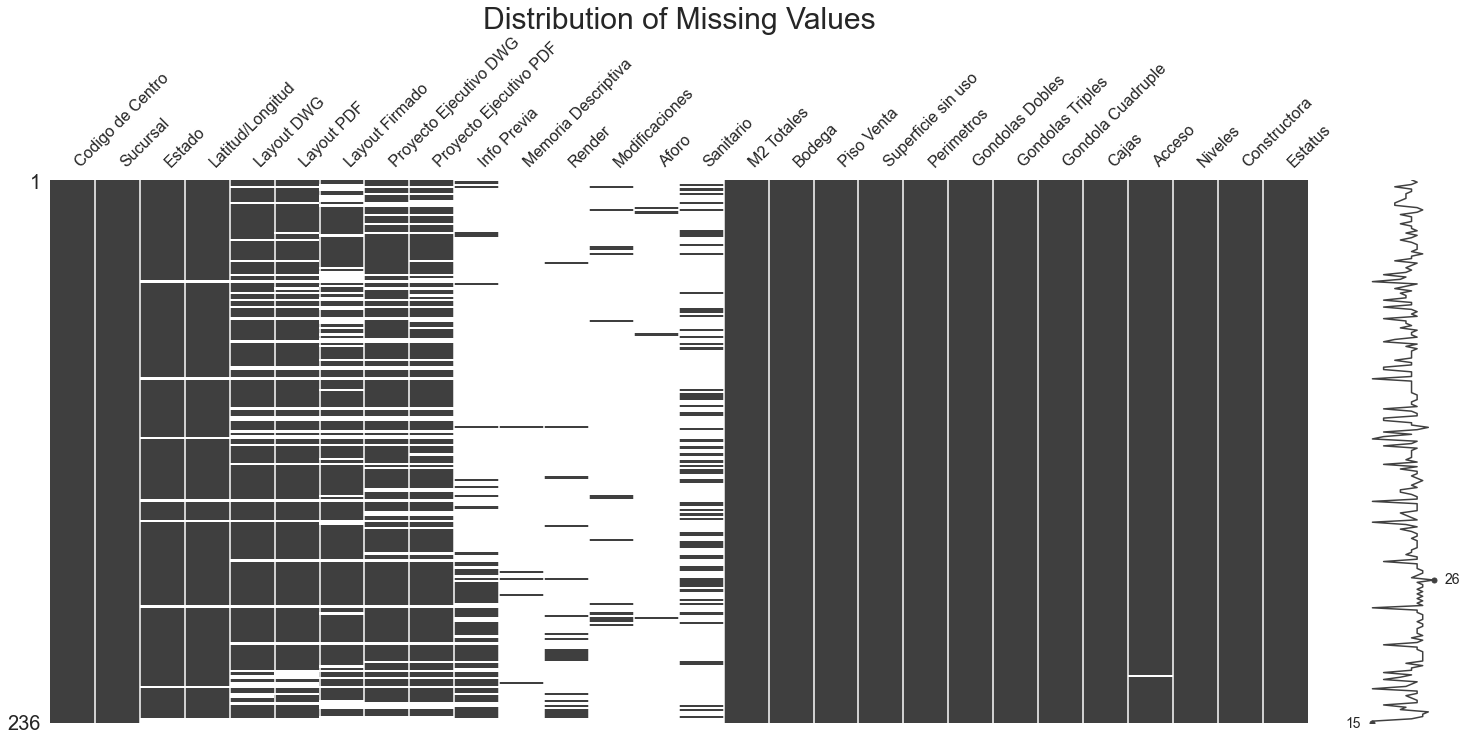

In [9]:
# Visualizing missing data
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30)
plt.show()

<b>We have a lof of missing values!!!... Let's analyze feature by feature to understand the missing values.</b>

<a id="2"></a>
# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">2. Univariate Analysis</div>

<b>We'll explore each feature</b> to see the distributions of features to get useful information.

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1. Exploring Categorical Features</div>

We have 17 categorical features in the dataset:

* 1. Codigo de Centro
* 2. Sucursal
* 3. Estado
* 4. Latitud/Longitud 
* 5. Layout DWG
* 6. Layout PDF
* 7. Layout Firmado
* 8. Proyecto Ejecutivo DWG
* 9. Proyecto Ejecutivo PDF
* 10. Info Previa
* 11. Memoria Descriptiva
* 12. Render
* 13. Modificaciones
* 14. Aforo
* 15. Sanitario
* 16. Constructora
* 17. Estatus

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.1. Codigo de Centro</div>

'Codigo de Centro' show us the code of every store. <b>We must check if it has missing values or duplicated values:</b>

In [10]:
# Missing values
df['Codigo de Centro'].isnull().any()

False

In [11]:
#Duplicated values
df['Codigo de Centro'].duplicated().any()

False

* And it's  clear that there's <b>no missing or duplicated value</b> on the feature 'Codigo de Centro'.

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.2. Sucursal</div>

'Sucursal' show us the name of every store. <b>We must check if it has missing values or duplicated values:</b>

In [12]:
# Missing values
df['Sucursal'].isnull().any()

False

In [13]:
# Duplicated values
df['Sucursal'].duplicated().any()

True

* It looks <b>we don't have no missing but we have duplicated values</b> on the feature 'Sucursal'.

In [14]:
# Printing duplicated values
df[df['Sucursal'].duplicated() == True]

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
86,CEN087,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Desconocido
112,CEN113,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Desconocido
139,CEN140,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Desconocido
148,CEN149,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Desconocido
185,CEN186,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Desconocido
231,CEN232,AMERICAS CHETUMAL,Quintana Roo,"18.52068762891045, -88.32219791201365",X,X,X,X,X,X,NaN,X,NaN,NaN,NaN,206.79,17.84,179.09,10.17,28.0,8,4,0,3,8.31,1,CODESA,Abierta
233,CEN234,MITHIKA,Mexico City,"19.359175586951622, -99.16937428867156",X,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,230.29,18.78,195.97,15.68,30.0,12,1,0,3,5.89,1,OTROS,Proxima Apertura


* Lets explore one by one:

In [15]:
# DESCONOCIDO
desconocido = df[df['Sucursal'] == 'DESCONOCIDO']
desconocido

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
44,CEN045,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido
86,CEN087,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido
112,CEN113,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido
139,CEN140,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido
148,CEN149,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido
185,CEN186,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,OTROS,Desconocido


* Having 'DESCONOCIDO' by value means that the store didn't open by negotiation, so we'll keep the drop duplicated values to explore how many of them didn't get a chance.

In [16]:
# AMERICAS CHETUMAL
americas_chetumal = df[df['Sucursal'] == 'AMERICAS CHETUMAL']
americas_chetumal

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
55,CEN056,AMERICAS CHETUMAL,Quintana Roo,"18.52228124763677, -88.30168884328829",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,No Abrio
231,CEN232,AMERICAS CHETUMAL,Quintana Roo,"18.52068762891045, -88.32219791201365",X,X,X,X,X,X,NaN,X,NaN,NaN,NaN,206.79,17.84,179.09,10.17,28.0,8,4,0,3,8.31,1,CODESA,Abierta


In [17]:
# MITHIKA
mitihka = df[df['Sucursal'] == 'MITHIKA']
mitihka

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
60,CEN061,MITHIKA,Mexico City,"19.359195831385787, -99.16934210216465",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.00,0,OTROS,Inhabilitada
233,CEN234,MITHIKA,Mexico City,"19.359175586951622, -99.16937428867156",X,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,230.29,18.78,195.97,15.68,30.0,12,1,0,3,5.89,1,OTROS,Proxima Apertura


* Duplicated values, 'AMERICAS CHETUMAL' and 'MITIHKA', means that the project suffered a chage or relocalitation, so we'll drop the first drop the first element. 

In [18]:
# Drop duplicated values in 'Sucursal' for 'AMERICAS CHETUMAL'
americas_chetumal.drop_duplicates(subset='Sucursal',keep='last',inplace=True)
americas_chetumal

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
231,CEN232,AMERICAS CHETUMAL,Quintana Roo,"18.52068762891045, -88.32219791201365",X,X,X,X,X,X,NaN,X,NaN,NaN,NaN,206.79,17.84,179.09,10.17,28.0,8,4,0,3,8.31,1,CODESA,Abierta


In [19]:
# Drop duplicated values in 'Sucursal' for 'MITIHKA'
mitihka.drop_duplicates(subset='Sucursal',keep='last',inplace=True)
mitihka

,Codigo de Centro,Sucursal,Estado,Latitud/Longitud,Layout DWG,Layout PDF,Layout Firmado,Proyecto Ejecutivo DWG,Proyecto Ejecutivo PDF,Info Previa,Memoria Descriptiva,Render,Modificaciones,Aforo,Sanitario,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Gondolas Triples,Gondola Cuadruple,Cajas,Acceso,Niveles,Constructora,Estatus
233,CEN234,MITHIKA,Mexico City,"19.359175586951622, -99.16937428867156",X,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,230.29,18.78,195.97,15.68,30.0,12,1,0,3,5.89,1,OTROS,Proxima Apertura


In [20]:
# Create a new dataframe
df_2 = df[(df['Sucursal'] != 'AMERICAS CHETUMAL')&(df['Sucursal'] != 'MITHIKA')]
df_2 = pd.concat([df_2,americas_chetumal,mitihka])

In [21]:
# Labeling stores status
sucursales = df_2['Sucursal'].apply(lambda x: 'Unknown' if x== 'DESCONOCIDO' else 'Known')

In [22]:
# Pie chart store status
fig = px.pie(sucursales, 
            values=sucursales.value_counts(),
            names=sucursales.value_counts().index,
            title='Information Stores',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have information about 97.4% of the stores.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.3. Estado</div>

'Estado' show us the states's name of every store.

In [23]:
estados = df_2.copy()

In [24]:
estados.rename({
    'Sucursal':'Stores',
    'Estado':'State'
    },
    axis=1,inplace=True)

In [25]:
# Grouping info by top 7 states
estados = estados.groupby('State').agg('count')[['Stores']].sort_values(by='Stores',ascending=False)[0:7].sort_values(by='Stores',ascending=False)

In [26]:
# Bart chart top 7 states
fig = px.bar(
    estados, y=estados.index, x='Stores',
    text='Stores',
    title="Top 7 Number of Stores by State", template='plotly_dark',
    color=estados.index)
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>Easily seen that most of the stores types are in Mexico City, follow by Mexico State and Quintana Roo.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.4. Latitud/Longitud</div>

'Latitud/Longitud show us the location of every store. 

In [27]:
# Creating a map of Mexico
mexico = folium.Map(location=[23.855857815557215, -102.64247270638153], tiles="Stamen Toner", zoom_start=5)

In [28]:
# Making a copy from df_2
locations = df_2.copy()

In [29]:
# Spliting 'Latitud/Longitud' in Latitude and Longitude
locations = locations['Latitud/Longitud'].str.split(',',expand=True)

In [30]:
# Renaming columns and droping missing values
locations.columns = ['Latitude','Longitude']
locations.dropna(inplace=True)

In [31]:
# Coverting columns to numeric
locations['Latitude'] = pd.to_numeric(locations['Latitude'])
locations['Longitude'] = pd.to_numeric(locations['Longitude'])

In [32]:
# Displaying locations
for i in range(len(locations)):
    # Local
    folium.Circle(
        radius=1000,
        location=[locations.iloc[i][0],locations.iloc[i][1]],
        color="crimson",
        fill=False,
    ).add_to(mexico)
    # Global
    folium.CircleMarker(
        location=[locations.iloc[i][0],locations.iloc[i][1]],
        radius=10,
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(mexico)

In [33]:
# Displaying Locations
mexico

* As we can see, <b>most of the stores are in the center of the country.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.5. Layout DWG</div>

'Layout DWG' show us if the store has a layout in DWG format. 

In [34]:
# Making a copy from df_2
layout_dwg = df_2.copy()

In [35]:
# Renaming values
layout_dwg = layout_dwg['Layout DWG'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [36]:
layout_dwg.value_counts()

YES    198
NO      36
Name: Layout DWG, dtype: int64

In [37]:
# Pie chart
fig = px.pie(layout_dwg, 
            values=layout_dwg.value_counts(),
            names=layout_dwg.value_counts().index,
            title='Do we have the layout in DWG format?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have the 84.6% of the stores in DWG format.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.6. Layout PDF</div>

'Layout PDF' show us if the store has a layout in PDF format. 

In [38]:
# Making a copy from df_2
layout_pdf = df_2.copy()

In [39]:
# Renaming values
layout_pdf = layout_pdf['Layout PDF'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [40]:
layout_pdf.value_counts()

YES    196
NO      38
Name: Layout PDF, dtype: int64

In [41]:
# Pie chart
fig = px.pie(layout_pdf, 
            values=layout_pdf.value_counts(),
            names=layout_pdf.value_counts().index,
            title='Do we have the layout in PDF format?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have the 83.8% of the stores in PDF format.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.7. Layout Firmado</div>

'Layout Firmado' show us if the project was approved. 

In [42]:
# Making a copy from df_2
layout_signed = df_2.copy()

In [43]:
# Renaming values
layout_signed = layout_signed['Layout Firmado'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [44]:
layout_signed.value_counts()

YES    174
NO      60
Name: Layout Firmado, dtype: int64

In [45]:
# Pie chart
fig = px.pie(layout_signed, 
            values=layout_signed.value_counts(),
            names=layout_signed.value_counts().index,
            title='Do we have the project approved?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have the 73.9% of the projects approved.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.8. Proyecto Ejecutivo DWG</div>

'Proyecto Ejecutivo' show us if the project has a layout in DWG format. 

In [46]:
# Making a copy from df_2
project_dwg = df_2.copy()

In [47]:
# Renaming values
project_dwg = project_dwg['Proyecto Ejecutivo DWG'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [48]:
project_dwg.value_counts()

YES    187
NO      47
Name: Proyecto Ejecutivo DWG, dtype: int64

In [49]:
# Pie chart
fig = px.pie(project_dwg, 
            values=project_dwg.value_counts(),
            names=project_dwg.value_counts().index,
            title='Do we have the project in DWG format?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have the 79.9% of the projects in DWG format.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.9. Proyecto Ejecutivo PDF</div>

'Proyecto Ejecutivo PDF' show us if the project has a layout in PDF format. 

In [50]:
# Making a copy from df_2
project_pdf = df_2.copy()

In [51]:
# Renaming values
project_pdf = project_pdf['Proyecto Ejecutivo PDF'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [52]:
project_pdf.value_counts()

YES    180
NO      54
Name: Proyecto Ejecutivo PDF, dtype: int64

In [53]:
# Pie chart
fig = px.pie(project_pdf, 
            values=project_pdf.value_counts(),
            names=project_pdf.value_counts().index,
            title='Do we have the project in PDF format?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have the 76.9% of the projects in PDF format.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.10. Info Previa</div>

'Info Previa' show us if the project had previous info. 

In [54]:
# Making a copy from df_2
project_info = df_2.copy()

In [55]:
# Renaming values
project_info = project_info['Info Previa'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [56]:
project_info.value_counts(),

(NO     173
 YES     61
 Name: Info Previa, dtype: int64,)

In [57]:
# Pie chart
fig = px.pie(project_info, 
            values=project_info.value_counts(),
            names=project_info.value_counts().index,
            title='Did we have previous info of the project?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We just had previous info in the 26.1% of the projects.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.11. Memoria Descriptiva</div>

'Memoria Descriptiva' show us if the project has descriptive memory. 

In [58]:
# Making a copy from df_2
project_memory = df_2.copy()

In [59]:
# Renaming values
project_memory = project_memory['Memoria Descriptiva'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [60]:
project_memory.value_counts()

NO     229
YES      5
Name: Memoria Descriptiva, dtype: int64

In [61]:
# Pie chart
fig = px.pie(project_memory, 
            values=project_memory.value_counts(),
            names=project_memory.value_counts().index,
            title='Do we have memorys of the project?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have descriotive memory in the 2.14% of the projects.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.12. Render</div>

'Render' show us if the project has renders. 

In [62]:
# Making a copy from df_2
project_render = df_2.copy()

In [63]:
# Renaming values
project_render = project_render['Render'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [64]:
project_render.value_counts()

NO     214
YES     20
Name: Render, dtype: int64

In [65]:
# Pie chart
fig = px.pie(project_render, 
            values=project_render.value_counts(),
            names=project_render.value_counts().index,
            title='Do we have renders of the project?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>We have renders in the 8.55% of the projects.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.13. Modificaciones</div>

'Modificaciones' show us if project store had modifications. 

In [66]:
# Making a copy from df_2
project_modifications = df_2.copy()

In [67]:
# Renaming values
project_modifications = project_modifications['Modificaciones'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [68]:
# Pie chart
fig = px.pie(project_modifications, 
            values=project_modifications.value_counts(),
            names=project_modifications.value_counts().index,
            title='Did the stores have modifications in their layouts?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>5.98% of the stores have changed their initial layout.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.14. Aforo</div>

'Aforo' show us if project store has a flow study. 

In [69]:
# Making a copy from df_2
project_flow = df_2.copy()

In [70]:
# Renaming values
project_flow = project_flow['Aforo'].apply(lambda x: 'YES' if x=='X' else 'NO')

In [71]:
project_flow.value_counts()

NO     230
YES      4
Name: Aforo, dtype: int64

In [72]:
# Pie chart
fig = px.pie(project_flow, 
            values=project_flow.value_counts(),
            names=project_flow.value_counts().index,
            title='Do the stores have flow study?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b> Just 1.71% of the stores have made a flow study.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.15. Constructora</div>

'Construcutora' show us the builder of the store. 

In [73]:
# Making a copy from df_2
project_builder = df_2.copy()

In [74]:
# Renaming values
project_builder = project_builder['Constructora']

In [75]:
project_builder.value_counts()

CODESA       166
OTROS         46
COLOCAPIN      6
EMPIRICA       5
RTM            5
ARQUILOZA      4
KABA           1
EN LINEA       1
Name: Constructora, dtype: int64

In [76]:
# Pie chart
fig = px.pie(project_builder, 
            values=project_builder.value_counts(),
            names=project_builder.value_counts().index,
            title='Who is the most important builder for the company?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* Looks like <b>CODESA has built up the 70.9% of the stores in Mexico.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.1.16. Estatus</div>

'Estatus' show us the status of te store. 

In [77]:
# Making a copy from df_2
store_status = df_2.copy()

In [78]:
# Renaming values
store_status = store_status['Estatus']

In [79]:
store_status.value_counts()

Abierta             174
Cerrada              32
No Abrio             15
Desconocido           6
Proxima Apertura      5
Inhabilitada          1
Tienda en Linea       1
Name: Estatus, dtype: int64

In [80]:
# Pie chart
fig = px.pie(store_status, 
            values=store_status.value_counts(),
            names=store_status.value_counts().index,
            title='What is the status of the stores in Mexico?',
            template='plotly_dark'
            )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

* <b>With a 74.4%, most of the projects that the retailer have been projected in Mexico are still open.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2. Explorig Numeric Features </div>

We have 11 numerical features in the dataset:

* 1. M2 Totales
* 2. Bodega
* 3. Piso Venta
* 4. Superficie sin uso
* 5. Perimetros
* 6. Gondolas Dobles
* 7. Gondolas Triples
* 8. Gondola Cuadruple
* 9. Cajas
* 10. Acceso
* 11. Niveles



# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.1. M2 Totales</div>

'M2' size of the store. 

In [81]:
# Making a copy from df_2
square_meters = df_2.copy()

In [82]:
# Filtering values different than 0
square_meters = square_meters[square_meters['M2 Totales']!=0]

In [83]:
# Droping missing values
square_meters = square_meters['M2 Totales']
square_meters.dropna(inplace=True)

In [84]:
# Mean, min and max
mean_store = square_meters.mean()
min_store = square_meters.min()
max_store = square_meters.max()

In [85]:
# Boxplot
fig = px.box(y = square_meters.values,
        template='plotly_dark',
        title = 'Square Meters'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [86]:
# Distribution plot
hist_data = [square_meters]
group_labels = ['Distribution Square Meters']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Square Meters'
                )
fig.show()

In [87]:
# Insights
print('The mean store has {} m2.'.format(mean_store))
print('The minimum store has {} m2.'.format(min_store))
print('The maximum store has {} m2.'.format(max_store))

The mean store has 330.7146634615382 m2.
The minimum store has 16.44 m2.
The maximum store has 951.71 m2.


In [88]:
# Insights
df_2[df_2['M2 Totales']==max_store]['Sucursal']

24    INSURGENTES FLAGSHIP
Name: Sucursal, dtype: object

In [89]:
# Insights
df_2[df_2['M2 Totales']==min_store]['Sucursal']

66    AEROPUERTO SALAS
Name: Sucursal, dtype: object

* <b>Square meters as above, we can see that mostly distributed between 200 and 400. Maximun size is 951.71 m2, minimun is 16.44 m2 and the mean is 330.72 m2.</b>
* <b>The biggest store is Insurgentes Flagship.</b>
* <b>The smallest store is Aeropuerto Salas.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.2. Bodega</div>

'Bodega' size of the stockroom. 

In [90]:
# Making a copy from df_2
stockroom_meters = df_2.copy()

In [91]:
# Filtering values different than 0
stockroom_meters = stockroom_meters[stockroom_meters['Bodega']!=0]

In [92]:
# Droping missing values
stockroom_meters = stockroom_meters['Bodega']
stockroom_meters.dropna(inplace=True)

In [93]:
# Mean, min and max
mean_stockroom = stockroom_meters.mean()
min_stockroom = stockroom_meters.min()
max_stockroom = stockroom_meters.max()

In [94]:
# Boxplot
fig = px.box(y = stockroom_meters.values,
        template='plotly_dark',
        title = 'Stockroom Meters'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [95]:
# Distribution plot
hist_data = [stockroom_meters]
group_labels = ['Distribution Stockroom Meters']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Stockroom Meters'
                )
fig.show()

In [96]:
# Insights
print('The mean stockroom has {} m2.'.format(mean_stockroom))
print('The minimum stockroom has {} m2.'.format(min_stockroom))
print('The maximum stockroom has {} m2.'.format(max_stockroom))

The mean stockroom has 42.83585858585862 m2.
The minimum stockroom has 0.81 m2.
The maximum stockroom has 339.4 m2.


In [97]:
# Insights
df_2[df_2['Bodega']==max_stockroom]['Sucursal']

25    LEON CENTRO PORTALES
Name: Sucursal, dtype: object

In [98]:
# Insights
df_2[df_2['Bodega']==min_stockroom]['Sucursal']

50    AEROPUERTO VOLARIS
Name: Sucursal, dtype: object

* <b>Stockroom are distributed between 0 and 50. Maximun size is 339.4 m2, minimun is 0.81 m2 and the mean is 42.84 m2.</b>
* <b>The store with the biggest stockroom is Leon Centro Portales.</b>
* <b>The store with the smallest strockroom is Aeropuerto Volaris.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.3. Piso Venta</div>

'Piso Venta' size of the sales floor. 

In [99]:
# Making a copy from df_2
salesfloor_meters = df_2.copy()

In [100]:
# Filtering values different than 0
salesfloor_meters = salesfloor_meters[salesfloor_meters['Piso Venta']!=0]

In [101]:
# Droping missing values
salesfloor_meters = salesfloor_meters['Piso Venta']
salesfloor_meters.dropna(inplace=True)

In [102]:
# Mean, min and max
mean_sales = salesfloor_meters.mean()
min_sales = salesfloor_meters.min()
max_sales = salesfloor_meters.max()

In [103]:
# Boxplot
fig = px.box(y = salesfloor_meters.values,
        template='plotly_dark',
        title = 'Sales Floor Meters'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [104]:
# Distribution plot
hist_data = [salesfloor_meters]
group_labels = ['Distribution Sales Floor Meters']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Sales Floor Meters'
                )
fig.show()

In [105]:
# Insights
print('The mean sales floor has {} m2.'.format(mean_sales))
print('The minimum sales floor has {} m2.'.format(min_sales))
print('The maximum sales floor has {} m2.'.format(max_sales))

The mean sales floor has 261.8296634615385 m2.
The minimum sales floor has 7.79 m2.
The maximum sales floor has 683.12 m2.


In [106]:
# Insights
df_2[df_2['Piso Venta']==max_sales]['Sucursal']

24    INSURGENTES FLAGSHIP
Name: Sucursal, dtype: object

In [107]:
# Insights
df_2[df_2['Piso Venta']==min_sales]['Sucursal']

66    AEROPUERTO SALAS
Name: Sucursal, dtype: object

* <b>Sales floor are distributed between 7.79 and 683.12. Maximun size is 339.4 m2, minimun is 0.81 m2 and the mean is 261.83 m2.</b>
* <b>The store with the biggest sales floor is Insurgentes Flagship.</b>
* <b>The store with the smallest sales floor is Aeropuerto Salas.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.4. Superficie sin uso</div>

'Superficie' size of the useless area. 

In [108]:
# Making a copy from df_2
useless_meters = df_2.copy()

In [109]:
# Filtering values different than 0
useless_meters = useless_meters[useless_meters['Superficie sin uso']!=0]

In [110]:
# Droping missing values
useless_meters = useless_meters['Superficie sin uso']
useless_meters.dropna(inplace=True)

In [111]:
# Mean, min and max
mean_useless = useless_meters.mean()
min_useless = useless_meters.min()
max_useless = useless_meters.max()

In [112]:
# Boxplot
fig = px.box(y = useless_meters.values,
        template='plotly_dark',
        title = 'Useless Meters'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [113]:
# Distribution plot
hist_data = [useless_meters]
group_labels = ['Distribution Useless Meters']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Useless Meters'
                )
fig.show()

In [114]:
# Insights
print('The mean useless area has {} m2.'.format(mean_useless))
print('The minimun useless area floor has {} m2.'.format(min_useless))
print('The maximum useless area has {} m2.'.format(max_useless))

The mean useless area has 29.405828877005348 m2.
The minimun useless area floor has 0.5 m2.
The maximum useless area has 244.57 m2.


In [115]:
# Insights
df_2[df_2['Superficie sin uso']==max_useless]['Sucursal']

93    ZENTRALIA CIUDAD DEL CARMEN
Name: Sucursal, dtype: object

In [116]:
# Insights
df_2[df_2['Superficie sin uso']==min_useless]['Sucursal']

226    APTO T1 GRANDE
Name: Sucursal, dtype: object

* <b>Useless area are distributed between 0 and 50. Maximun size is 244.57 m2, minimun is 0.5 m2 and the mean is 29.41 m2.</b>
* <b>The store with the biggest sales floor is Zentralia Ciudad del Carmen.</b>
* <b>The store with the smallest sales floor is Aeropuerto Terminal 1.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.5. Perimetros</div>

'Perimetros' number of shelfs in stores. 

In [117]:
# Making a copy from df_2
number_shelf = df_2.copy()

In [118]:
# Filtering values different than 0
number_shelf = number_shelf[number_shelf['Perimetros']!=0]

In [119]:
# Droping missing values
number_shelf = number_shelf['Perimetros']
number_shelf.dropna(inplace=True)

In [120]:
# Mean, min and max
mean_shelf = number_shelf.mean()
min_shelf = number_shelf.min()
max_shelf = number_shelf.max()

In [121]:
# Boxplot
fig = px.box(y = number_shelf.values,
        template='plotly_dark',
        title = 'Number of Shelfs'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [122]:
# Distribution plot
hist_data = [number_shelf]
group_labels = ['Distribution Shelfs']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Shelfs'
                )
fig.show()

In [123]:
# Insights
print('The mean number of shelfs is {}.'.format(mean_shelf))
print('The minimum number of shelfs is {}.'.format(min_shelf))
print('The maximum number of shelfs is {}.'.format(max_shelf))

The mean number of shelfs is 48.26716346153846.
The minimum number of shelfs is 1.0.
The maximum number of shelfs is 132.0.


In [124]:
# Insights
df_2[df_2['Perimetros']==max_shelf]['Sucursal']

173    PLAYA DEL CARMEN ESSES
Name: Sucursal, dtype: object

In [125]:
# Insights
df_2[df_2['Perimetros']==min_shelf]['Sucursal']

66    AEROPUERTO SALAS
Name: Sucursal, dtype: object

* <b>The number of shelfs are distributed between 20 and 80. Maximun size is 132, minimun is 1 and the mean is 49.</b>
* <b>The store with the biggest quantity of shelfs is Playa del Carmen Esses.</b>
* <b>The store with the smallest quantity of shelfs is Aeropuerto Salas.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.6. Gondolas Dobles</div>

'Gondolas Dobles' number of double shelfs in stores. 

In [126]:
# Making a copy from df_2
number_dshelf = df_2.copy()

In [127]:
# Filtering values different than 0
number_dshelf = number_dshelf[number_dshelf['Gondolas Dobles']!=0]

In [128]:
# Droping missing values
number_dshelf = number_dshelf['Gondolas Dobles']
number_dshelf.dropna(inplace=True)

In [129]:
# Mean, min and max
mean_dshelf = number_dshelf.mean()
min_dshelf = number_dshelf.min()
max_dshelf = number_dshelf.max()

In [130]:
# Boxplot
fig = px.box(y = number_dshelf.values,
        template='plotly_dark',
        title = 'Number of Double Shelfs'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [131]:
# Distribution plot
hist_data = [number_dshelf]
group_labels = ['Distribution Double Shelfs']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Double Shelfs'
                )
fig.show()

In [132]:
# Insights
print('The mean number of double shelfs is {}.'.format(mean_dshelf))
print('The minimum number of double shelfs is {}.'.format(min_dshelf))
print('The maximum number of double shelfs is {}.'.format(max_dshelf))

The mean number of double shelfs is 13.020100502512562.
The minimum number of double shelfs is 1.
The maximum number of double shelfs is 42.


In [133]:
# Insights
df_2[df_2['Gondolas Dobles']==max_dshelf]['Sucursal']

59    LA ISLA CANCUN
Name: Sucursal, dtype: object

In [134]:
# Insights
df_2[df_2['Gondolas Dobles']==min_dshelf]['Sucursal']

1                  GALERIAS COAPA
38              SCOTIA AEROPUERTO
42                     TERMINAL 2
50             AEROPUERTO VOLARIS
51       AEROPUERTO INTERNACIONAL
94          PASEO LA FE MONTERREY
116    AMERICAS MORELIA (ESPACIO)
135          AEROPUERTO CANCUN T4
136             PLAZA INSURGENTES
151     PLAZA FIESTA SAN  AGUSTIN
178                 PLAZA TEPEYAC
Name: Sucursal, dtype: object

* <b>The number of double shelfs are distributed between 0 and 26. Maximun size is 42, minimun is 1 and the mean is 13.</b>
* <b>The store with the biggest quantity of double shelfs is La Isla Cancun.</b>
* <b>The store with the smallest quantity of double shelfs is Galerias Coapa.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.7. Gondolas Triples</div>

'Gondolas Triples' number of triple shelfs in stores. 

In [135]:
# Making a copy from df_2
number_tshelf = df_2.copy()

In [136]:
# Filtering values different than 0
number_tshelf = number_tshelf[number_tshelf['Gondolas Triples']!=0]

In [137]:
# Droping missing values
number_tshelf = number_tshelf['Gondolas Triples']
number_tshelf.dropna(inplace=True)

In [138]:
# Mean, min and max
mean_tshelf = number_tshelf.mean()
min_tshelf = number_tshelf.min()
max_tshelf = number_tshelf.max()

In [139]:
# Boxplot
fig = px.box(y = number_tshelf.values,
        template='plotly_dark',
        title = 'Number of Triple Shelfs'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [140]:
# Distribution plot
hist_data = [number_tshelf]
group_labels = ['Distribution Double Shelfs']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Double Shelfs'
                )
fig.show()

In [141]:
# Insights
print('The mean number of triple shelfs is {}.'.format(mean_tshelf))
print('The minimum number of triple shelfs is {}.'.format(min_tshelf))
print('The maximum number of triple shelfs is {}.'.format(max_tshelf))

The mean number of triple shelfs is 6.664670658682635.
The minimum number of triple shelfs is 1.
The maximum number of triple shelfs is 33.


In [142]:
# Insights
df_2[df_2['Gondolas Triples']==max_tshelf]['Sucursal']

142    ALTAMA
Name: Sucursal, dtype: object

In [143]:
# Insights
df_2[df_2['Gondolas Triples']==min_tshelf]['Sucursal']

2                 MADERO CENTRO
18               GRAN PATIO GDL
23                CENTRO XALAPA
32             CUATRO CAMINOS B
51     AEROPUERTO INTERNACIONAL
53            GRAN PLAZA CANCUN
54             GALERIAS PACHUCA
168            POZA RICA CENTRO
197      FASHION MALL CHIHUAHUA
203              PUERTA TEXCOCO
208              APTO CD JUAREZ
224           PARQUE LINDAVISTA
233                     MITHIKA
Name: Sucursal, dtype: object

* <b>The number of triple shelfs are distributed between 0 and 10. Maximun size is 33, minimun is 1 and the mean is 7.</b>
* <b>The store with the biggest quantity of triple shelfs is Altama.</b>
* <b>The store with the smallest quantity of double shelfs is Madero Centro.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.8. Gondola Cuadruples</div>

'Gondola Cuadruple' number of cuadruple shelfs in stores. 

In [144]:
# Making a copy from df_2
number_cshelf = df_2.copy()

In [145]:
# Filtering values different than 0
number_cshelf = number_cshelf[number_cshelf['Gondola Cuadruple']!=0]

In [146]:
# Droping missing values
number_cshelf = number_cshelf['Gondola Cuadruple']
number_cshelf.dropna(inplace=True)

In [147]:
# Mean, min and max
mean_cshelf = number_cshelf.mean()
min_cshelf = number_cshelf.min()
max_cshelf = number_cshelf.max()

In [148]:
# Boxplot
fig = px.box(y = number_cshelf.values,
        template='plotly_dark',
        title = 'Number of Cuadruple Shelfs'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [149]:
# Distribution plot
hist_data = [number_cshelf]
group_labels = ['Distribution Cuadruple Shelfs']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Cuadruple Shelfs'
                )
fig.show()

In [150]:
# Insights
print('The mean number of cuadruple shelfs is {}.'.format(mean_cshelf))
print('The minimum number of cuadruple shelfs is {}.'.format(min_cshelf))
print('The maximum number of cuadruple shelfs is {}.'.format(max_cshelf))

The mean number of cuadruple shelfs is 3.3333333333333335.
The minimum number of cuadruple shelfs is 1.
The maximum number of cuadruple shelfs is 9.


In [151]:
# Insights
df_2[df_2['Gondola Cuadruple']==max_cshelf]['Sucursal']

94          PASEO LA FE MONTERREY
116    AMERICAS MORELIA (ESPACIO)
118              DORADOS SAN LUIS
Name: Sucursal, dtype: object

In [152]:
# Insights
df_2[df_2['Gondola Cuadruple']==min_cshelf]['Sucursal']

25           LEON CENTRO PORTALES
83          TORRE LATINOAMERICANA
100            ANGELOPOLIS PUEBLA
108    GALERIAS VALLE ORIENTE MTY
113            PLAZA MAGNO CENTRO
120           AMERICAS VERACRUZ B
173        PLAYA DEL CARMEN ESSES
180                PLAZA SATELITE
187               PLAZA SAN PEDRO
191             ACTINVER SANTA FE
Name: Sucursal, dtype: object

* <b>The number of cuadruple shelfs are distributed between 1 and 5. Maximun size is 9, minimun is 1 and the mean is 3.3.</b>
* <b>The store with the biggest quantity of triple shelfs is Paseo la Fe Monterrey.</b>
* <b>The store with the smallest quantity of double shelfs is Leon Centro Portales.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.9. Cajas</div>

'Cajas' number of cash registers. 

In [153]:
# Making a copy from df_2
number_register = df_2.copy()

In [154]:
# Filtering values different than 0
number_register = number_register[number_register['Cajas']!=0]

In [155]:
# Droping missing values
number_register = number_register['Cajas']
number_register.dropna(inplace=True)

In [156]:
# Mean, min and max
mean_register = number_register.mean()
min_register = number_register.min()
max_register = number_register.max()

In [157]:
# Boxplot
fig = px.box(y = number_register.values,
        template='plotly_dark',
        title = 'Number of Cash Register'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [158]:
# Distribution plot
hist_data = [number_register]
group_labels = ['Distribution Cash Register']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Cash Register'
                )
fig.show()

In [159]:
# Insights
print('The mean number of cash registers is {}.'.format(mean_register))
print('The minimum number of cash registers is {}.'.format(min_register))
print('The maximum number of cash registers is {}.'.format(max_register))

The mean number of cash registers is 3.394230769230769.
The minimum number of cash registers is 1.
The maximum number of cash registers is 6.


In [160]:
# Insights
df_2[df_2['Cajas']==max_register]['Sucursal']

11              PASEO ACOXPA
24      INSURGENTES FLAGSHIP
47          PASEO DEL CARMEN
76              PARQUE DELTA
83     TORRE LATINOAMERICANA
114         TAPACHULA CENTRO
Name: Sucursal, dtype: object

In [161]:
# Insights
df_2[df_2['Cajas']==min_register]['Sucursal']

170                 SANTA ANITA
204              APTO CHIHUAHUA
206                 APTO MTY TA
207                    APTO SLP
208              APTO CD JUAREZ
209    PUERTO PARAISO LOS CABOS
212               APTO MAZATLAN
Name: Sucursal, dtype: object

* <b>The number of cash register is bimodal 3 and 4. Maximun size is 4, minimun is 1 and the mean is 3.4.</b>
* <b>The store with the biggest quantity of cuadruple shelfs is Paseo Acoxpa.</b>
* <b>The store with the smallest quantity of cudruple shelfs is Santa Anita.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.10. Acceso</div>

'Acceso' number of entrances. 

In [162]:
# Making a copy from df_2
number_entrances = df_2.copy()

In [163]:
# Filtering values different than 0
number_entrances = number_entrances[number_entrances['Acceso']!=0]

In [164]:
# Droping missing values
number_entrances = number_entrances['Acceso']
number_entrances.dropna(inplace=True)

In [165]:
# Mean, min and max
mean_entrances = number_entrances.mean()
min_entrances = number_entrances.min()
max_entrances = number_entrances.max()

In [166]:
# Boxplot
fig = px.box(y = number_entrances.values,
        template='plotly_dark',
        title = 'Number of Entrances'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [167]:
# Distribution plot
hist_data = [number_entrances]
group_labels = ['Distribution Entrances']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Entrances'
                )
fig.show()

In [168]:
# Insights
print('The mean number of entrnaces is {}.'.format(mean_entrances))
print('The minimum number of entrances is {}.'.format(min_entrances))
print('The maximum number of entrances is {}.'.format(max_entrances))

The mean number of entrnaces is 6.588260869565216.
The minimum number of entrances is 1.2.
The maximum number of entrances is 14.0.


In [169]:
# Insights
df_2[df_2['Acceso']==max_entrances]['Sucursal']

206    APTO MTY TA
Name: Sucursal, dtype: object

In [170]:
# Insights
df_2[df_2['Acceso']==min_entrances]['Sucursal']

50    AEROPUERTO VOLARIS
Name: Sucursal, dtype: object

* <b>The number entrances are distributed between 4 and 8. Maximun size is 14, minimun is 1.2 and the mean is 6.59.</b>
* <b>The store with the biggest quantity of entrances is Aeropuerto Monterrey.</b>
* <b>The store with the smallest quantity of entrances is Aeropuerto Volaris.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">2.2.11. Niveles</div>

'Niveles' number of levels. 

In [171]:
# Making a copy from df_2
number_levels = df_2.copy()

In [172]:
# Filtering values different than 0
number_levels = number_levels[number_levels['Acceso']!=0]

In [173]:
# Droping missing values
number_levels = number_levels['Niveles']
number_levels.dropna(inplace=True)

In [174]:
# Mean, min and max
mean_levels = number_levels.mean()
min_levels = number_levels.min()
max_levels = number_levels.max()

In [175]:
# Boxplot
fig = px.box(y = number_levels.values,
        template='plotly_dark',
        title = 'Number of Levels'
        )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [176]:
# Distribution plot
hist_data = [number_levels]
group_labels = ['Distribution Levels']

fig = ff.create_distplot(hist_data, group_labels,show_hist=False)
fig.layout.template = 'plotly_dark'
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),
                title='Distribution Levels'
                )
fig.show()

In [177]:
# Insights
print('The mean number of levels is {}.'.format(mean_levels))
print('The minimum number of levels is {}.'.format(min_levels))
print('The maximum number of levels is {}.'.format(max_levels))

The mean number of levels is 1.0913461538461537.
The minimum number of levels is 1.
The maximum number of levels is 3.


In [178]:
# Insights
df_2[df_2['Niveles']==max_levels]['Sucursal']

168          POZA RICA CENTRO
173    PLAYA DEL CARMEN ESSES
188                 MADERO 67
Name: Sucursal, dtype: object

In [179]:
# Insights
df_2[df_2['Niveles']==min_levels]['Sucursal']

0                 ARAGON
1         GALERIAS COAPA
2          MADERO CENTRO
3                MUNDO E
4              LUNA PARC
             ...        
229       PARQUE TEPEYAC
230     PORTAL SAN ANGEL
232    GALERIAS SALTILLO
231    AMERICAS CHETUMAL
233              MITHIKA
Name: Sucursal, Length: 192, dtype: object

* <b>The number levels are distributed between 1 and 2. Maximun size is 3, minimun is 1 and the mean is 1.</b>
* <b>The store with the biggest quantity of entrances is Poza Rica Centro.</b>
* <b>The store with the smallest quantity of entrances is Aragon.</b>

<a id="3"></a>
# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">3. Sales Year Analysis (2022) </div>

In [180]:
# Declare an empty dataframe to have a base
df_empty = pd.DataFrame()

In [181]:
# Stablish current directory
current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()
assets = current_dir/'assets'

In [182]:
# Joining the dataframes
for file in assets.iterdir():
    if str(file).endswith('.csv'):
        df_empty = df_empty.append(pd.read_csv(file))

In [183]:
# Feature 'Fecha Corte' to datetime
df_empty['Fecha Corte'] = pd.to_datetime(df_empty['Fecha Corte'])

In [184]:
# Grouping Sales 2022
total_sales_2022 = df_empty.groupby(by=['Fecha Corte']).agg('sum')

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">3.1. Sales by Familys</div>

In [185]:
# Line charts for family
for i in total_sales_2022.columns:
    fig = px.line(total_sales_2022,x=total_sales_2022.index,y=i)
    fig.layout.template='plotly_dark'
    fig.update_layout(font=dict(size=17,family="Franklin Gothic"),
                    title='Sales ' + i +' by Month(2022)'
                    )
    fig.show()

In [186]:
# Total sales for familiy
total_sales_2022 = df_empty.groupby(pd.Grouper(key='Fecha Corte',freq='M')).agg('sum')
total_sales_2022.style.background_gradient().format('{:,.0f} $')

,Hogar,Salud y Bellleza,Moda,Juguetes,Tecnologia,Viajes,Papeleria,Venta Total
Fecha Corte,,,,,,,,
2022-01-31 00:00:00,"130,484,920 $","124,171,928 $","130,891,991 $","121,763,714 $","138,639,801 $","130,788,651 $","137,923,020 $","914,664,025 $"
2022-02-28 00:00:00,"132,213,945 $","123,070,071 $","137,864,887 $","131,107,688 $","132,711,612 $","138,085,760 $","133,775,206 $","928,829,169 $"
2022-03-31 00:00:00,"125,923,411 $","139,909,641 $","126,261,287 $","131,952,934 $","127,960,016 $","144,234,691 $","132,516,430 $","929,358,410 $"
2022-04-30 00:00:00,"122,556,643 $","138,488,794 $","127,130,130 $","112,036,067 $","129,874,602 $","135,416,567 $","134,711,536 $","900,214,339 $"
2022-05-31 00:00:00,"133,241,045 $","132,739,713 $","122,586,239 $","124,348,899 $","132,030,927 $","122,394,983 $","138,333,116 $","905,674,922 $"
2022-06-30 00:00:00,"130,927,623 $","137,327,925 $","129,576,371 $","128,870,995 $","130,366,946 $","136,701,527 $","124,544,311 $","918,315,698 $"
2022-07-31 00:00:00,"129,778,407 $","133,323,801 $","130,242,295 $","128,512,346 $","129,124,291 $","132,163,973 $","125,983,991 $","909,129,104 $"
2022-08-31 00:00:00,"134,426,744 $","135,240,454 $","135,305,148 $","136,868,356 $","129,417,940 $","123,926,016 $","135,391,626 $","930,576,284 $"
2022-09-30 00:00:00,"124,518,829 $","125,377,869 $","124,212,735 $","127,507,830 $","131,388,912 $","131,032,110 $","126,782,713 $","890,820,998 $"


In [187]:
# Total sales for familiy
sales_family = pd.DataFrame(total_sales_2022.max(),columns=['Total Sales'])
sales_family = sales_family.iloc[0:7]
sales_family.style.background_gradient().format('{:,.0f} $')

,Total Sales
Hogar,"134,426,744 $"
Salud y Bellleza,"139,909,641 $"
Moda,"137,864,887 $"
Juguetes,"136,868,356 $"
Tecnologia,"138,639,801 $"
Viajes,"144,234,691 $"
Papeleria,"138,333,116 $"


In [188]:
# Mean sales for familiy for store
sales_family = pd.DataFrame(total_sales_2022.mean(),columns=['Total Sales'])
sales_family = sales_family.iloc[0:7]
sales_family.style.background_gradient().format('{:,.0f} $')

,Total Sales
Hogar,"129,341,285 $"
Salud y Bellleza,"132,183,355 $"
Moda,"129,341,231 $"
Juguetes,"126,996,537 $"
Tecnologia,"131,279,450 $"
Viajes,"132,749,364 $"
Papeleria,"132,217,994 $"


In [189]:
sales_family.max()-sales_family.min()

Total Sales    5.752828e+06
dtype: float64

* <b>Almost all the familiys sold the same on 2022.</b>
* <b>The family with most sales is 'Travels' with 143,832,674.00 $.</b>
* <b>The family with less sales is 'Home' with 134,392,512 $.</b>
* <b>The diffrence between 'Home' and 'Sales is 9,440,162.00 $.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">3.2. Top Sales Stores</div>

In [190]:
# Grouping top 10 stores 2020
top_stores = df_empty.groupby(by=['Sucursal']).agg('sum')[['Venta Total']].sort_values(['Venta Total'],ascending=False)[0:10]

In [191]:
# Bar chart top 10 stores 2022
fig = px.bar(
    top_stores, y=top_stores['Venta Total'], x=top_stores.index,
    text=top_stores['Venta Total'],
    title="Top 10 Stores 2022", template='plotly_dark',
    color=top_stores.index)
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [192]:
# Top locations
top_locations = df_empty.groupby(by=['Sucursal']).agg('sum')[['Venta Total']].sort_values(['Venta Total'],ascending=False)[0:10]
top_store_locations = df_2[['Sucursal','Latitud/Longitud']]
top_coordinates = top_store_locations['Latitud/Longitud'].str.split(',',expand=True)
top_semifinal_locations = pd.concat([top_store_locations,top_coordinates],axis=1)
top_semifinal_locations.drop(['Latitud/Longitud'],axis=1,inplace=True)
top_final_location = top_locations.merge(top_semifinal_locations,left_on='Sucursal',right_on='Sucursal',how='left')

In [193]:
# Creating a map of Mexico
mexico_top = folium.Map(location=[23.855857815557215, -102.64247270638153], tiles="Stamen Toner", zoom_start=5)

In [194]:
# Displaying top locations
for i in range(len(top_final_location)):
    # Local
    folium.Circle(
        radius=1000,
        location=[top_final_location.iloc[i][0],top_final_location.iloc[i][1]],
        color="crimson",
        fill=False,
    ).add_to(mexico)
    # Global
    folium.CircleMarker(
        location=[top_final_location.iloc[i][0],top_final_location.iloc[i][1]],
        radius=10,
        color="#25A673",
        fill=True,
        fill_color="#25A673",
    ).add_to(mexico_top)

In [195]:
# Displaying top locations
mexico_top

* <b>The top store is Flagship Insurgentes with 62,130,502.00 $.</b>
* <b>The top strores are located in the center and south of the country.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">3.3. Bottom Sales Stores</div>

In [196]:
# Grouping bottom 10 stores 2020
bottom_stores = df_empty.groupby(by=['Sucursal']).agg('sum')[['Venta Total']].sort_values(['Venta Total'],ascending=True)

In [197]:
# Filtering sales above 0
bottom_stores = bottom_stores[bottom_stores['Venta Total'] != 0][0:10]

In [198]:
# Bar chart bottom 10 stores 2020
fig = px.bar(
    bottom_stores, y=bottom_stores['Venta Total'], x=bottom_stores.index,
    text=bottom_stores['Venta Total'],
    title="Bottom 10 Stores 2022", template='plotly_dark',
    color=bottom_stores.index)
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [199]:
# Bottom locations
bottom_locations = df_empty.groupby(by=['Sucursal']).agg('sum')[['Venta Total']].sort_values(['Venta Total'],ascending=True)
bottom_locations = bottom_locations[bottom_locations['Venta Total'] != 0][0:10]
bottom_store_locations = df_2[['Sucursal','Latitud/Longitud']]
bottom_coordinates = bottom_store_locations['Latitud/Longitud'].str.split(',',expand=True)
bottom_semifinal_locations = pd.concat([bottom_store_locations,bottom_coordinates],axis=1)
bottom_semifinal_locations.drop(['Latitud/Longitud'],axis=1,inplace=True)
bottom_final_location = bottom_locations.merge(bottom_semifinal_locations,left_on='Sucursal',right_on='Sucursal',how='left')

In [200]:
# Creating a map of Mexico
mexico_bottom = folium.Map(location=[23.855857815557215, -102.64247270638153], tiles="Stamen Toner", zoom_start=5)

In [201]:
# Displaying bottom locations
for i in range(len(bottom_final_location)):
    # Local
    folium.Circle(
        radius=1000,
        location=[bottom_final_location.iloc[i][0],bottom_final_location.iloc[i][1]],
        color="crimson",
        fill=False,
    ).add_to(mexico)
    # Global
    folium.CircleMarker(
        location=[bottom_final_location.iloc[i][0],bottom_final_location.iloc[i][1]],
        radius=10,
        color="#A62525",
        fill=True,
        fill_color="#A62525",
    ).add_to(mexico_bottom)

In [202]:
mexico_bottom

* <b>The bottom store is Aeropuerto Salas with 17,234,024.00 $.</b>
* <b>The bottom stores are located in the center and north of the country.</b>
* <b>The bottom stores are located in airports.</b>

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">3.4. E-Commerce</div>

In [203]:
# Filtering Ecommerce
df_ecommerce = df_empty[df_empty['Sucursal']=='E COMMERCE']
df_ecommerce = df_ecommerce.groupby(pd.Grouper(key='Fecha Corte',freq='M')).agg('sum')
df_ecommerce.style.background_gradient().format('{:,.0f} $')

,Hogar,Salud y Bellleza,Moda,Juguetes,Tecnologia,Viajes,Papeleria,Venta Total
Fecha Corte,,,,,,,,
2022-01-31 00:00:00,"356,665 $","143,712 $","1,016,551 $","388,633 $","341,285 $","628,135 $","545,643 $","3,420,624 $"
2022-02-28 00:00:00,"455,539 $","514,341 $","3,535,681 $","275,429 $","256,134 $","554,561 $","824,746 $","6,416,431 $"
2022-03-31 00:00:00,"634,430 $","1,545,453 $","275,084 $","492,365 $","302,452 $","452,541 $","547,863 $","4,250,188 $"
2022-04-30 00:00:00,"235,634 $","245,331 $","452,214 $","345,527 $","164,561 $","155,688 $","245,239 $","1,844,194 $"
2022-05-31 00:00:00,"156,782 $","546,833 $","245,643 $","456,782 $","356,733 $","450,635 $","539,254 $","2,752,662 $"
2022-06-30 00:00:00,"323,484 $","145,202 $","635,005 $","569,668 $","467,959 $","574,074 $","646,502 $","3,361,894 $"
2022-07-31 00:00:00,"224,560 $","346,668 $","537,416 $","235,617 $","333,869 $","560,252 $","522,679 $","2,761,061 $"
2022-08-31 00:00:00,"34,232 $","81,662 $","296,084 $","215,499 $","115,498 $","217,278 $","272,402 $","1,232,655 $"
2022-09-30 00:00:00,"226,329 $","145,167 $","245,894 $","221,264 $","353,098 $","463,938 $","243,472 $","1,899,162 $"


In [204]:
# Filtering dataframe
df_ecommerce_total = df_empty[df_empty['Sucursal']=='E COMMERCE'][['Sucursal','Fecha Corte','Venta Total']].set_index('Fecha Corte').sort_index()

In [205]:
# Filtering dataframe
df_top_store_total = df_empty[df_empty['Sucursal']=='INSURGENTES FLAGSHIP'][['Sucursal','Fecha Corte','Venta Total']].set_index('Fecha Corte').sort_index()

In [206]:
# Filtering dataframe
df_bottom_store_total = df_empty[df_empty['Sucursal']=='AEROPUERTO SALAS'][['Sucursal','Fecha Corte','Venta Total']].set_index('Fecha Corte').sort_index()

In [207]:
# Filtering dataframe
df_mean_store_total = df_empty.groupby(by=['Fecha Corte']).agg('mean')[['Venta Total']]
df_mean_store_total['Sucursal'] = 'MEAN STORE'

In [208]:
df_stores_comparisson = pd.concat([df_ecommerce_total,df_top_store_total,df_bottom_store_total,df_mean_store_total],axis=0)

In [209]:
# Line chart
fig = px.line(df_stores_comparisson,
                x=df_stores_comparisson.index,
                y='Venta Total',color='Sucursal',
                text='Venta Total')
fig.layout.template='plotly_dark'
fig.update_layout(font=dict(size=11,family="Franklin Gothic"),
                title='Sales by Month(2022)',
                
                )
fig.update_traces(textposition="top right")
fig.show()

* <b>Even when the e-commerce sales reach the sales of Insurgentes Flagship in march, the rest of the years sells less than a mean store, almost like the bottom sales store.</b>

<a id="4"></a>
# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 15px; line-height: 1 ;border-radius:5px ; font-size:20px">4. Prediction Sales</div>

In [210]:
# Filtering features
df_prediction = df_2[['Sucursal','M2 Totales','Bodega','Piso Venta','Superficie sin uso','Perimetros','Gondolas Dobles','Gondolas Triples','Gondola Cuadruple','Cajas','Acceso','Estatus']]

In [211]:
# Filtering on open strores
df_prediction = df_prediction[df_prediction['Estatus']=='Abierta']

In [212]:
# Dropping featrues
df_prediction.drop(['Estatus'],axis=1,inplace=True)

In [213]:
# Filtering features
df_sales_merge = df_empty[['Sucursal','Venta Total']]

In [214]:
# Grouping stores
df_sales_merge = df_sales_merge.groupby(by='Sucursal').agg('sum')

In [215]:
# Filtering sales above 0
df_sales_merge = df_sales_merge[df_sales_merge['Venta Total']!=0]

In [216]:
# Filling missing values in 'Acceso'
df_prediction['Acceso'].fillna(df_prediction['Acceso'].mean(),inplace=True)

In [217]:
# Combining Features
df_prediction['Gondolas Dobles'] = (df_prediction['Gondolas Dobles'] + df_prediction['Gondolas Triples']/2) + (df_prediction['Gondola Cuadruple']/2) 

In [218]:
# Dropping features
df_prediction.drop(['Gondolas Triples','Gondola Cuadruple'],axis=1,inplace=True)

In [219]:
# Merging dataframes
df_2022 = df_prediction.merge(df_sales_merge,left_on='Sucursal',right_on='Sucursal',how='left')

In [220]:
# Droping features
df_2022.drop(['Sucursal'],axis=1,inplace=True)

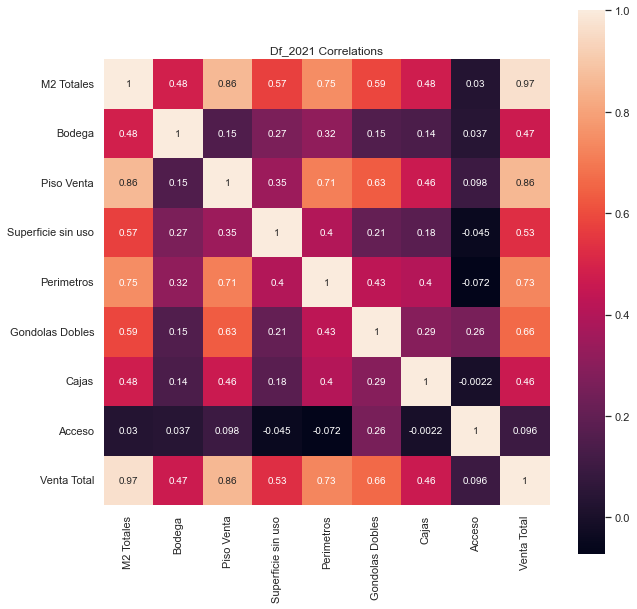

In [221]:
# Correlations df_2022
plt.figure(figsize=(10,10))
sns.heatmap(df_2022.corr(),square=True,annot=True,)
plt.title('Df_2021 Correlations')
plt.show()

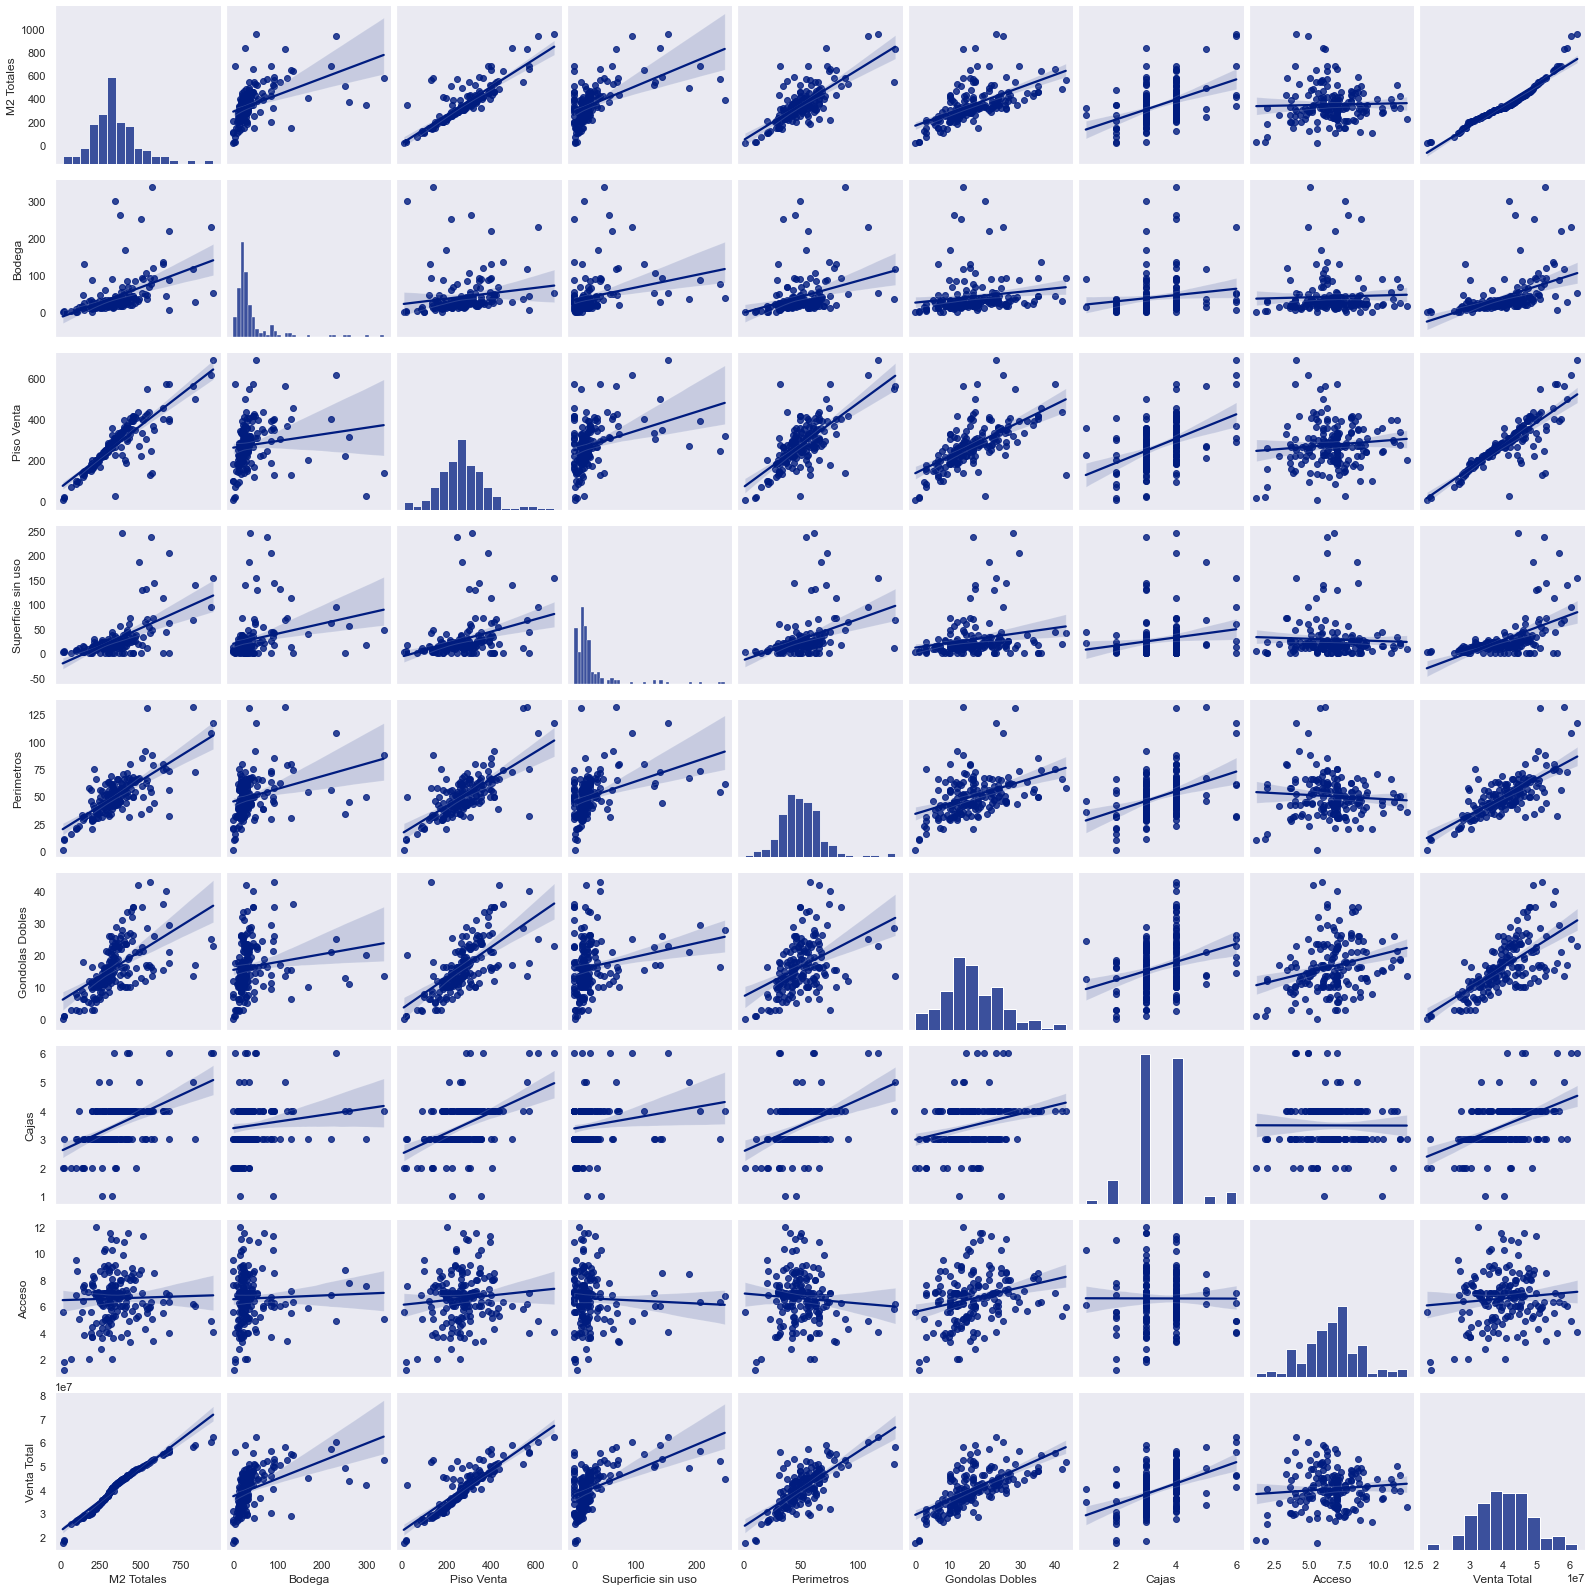

In [222]:
# Pairpot df_2022
sns.pairplot(df_2022,kind='reg')
plt.show()

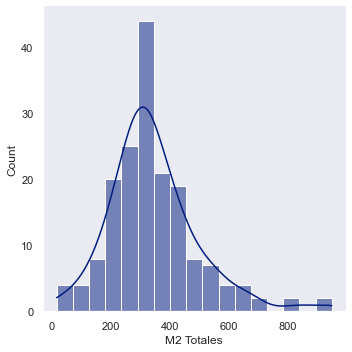

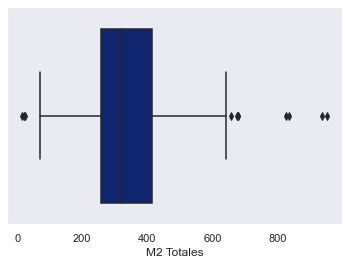

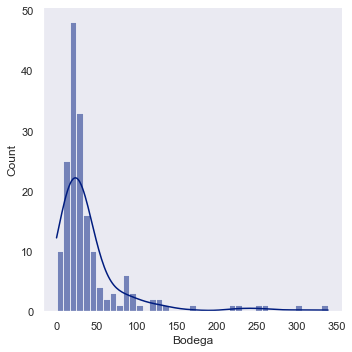

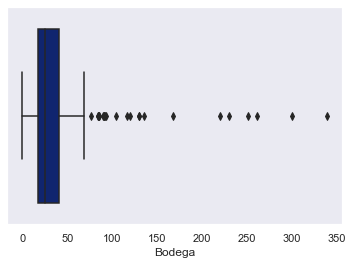

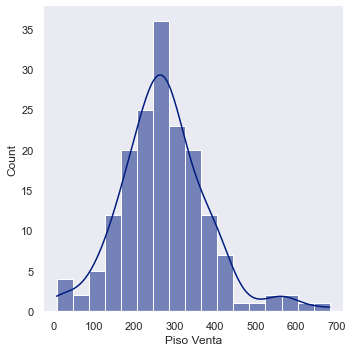

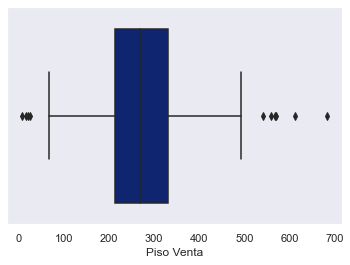

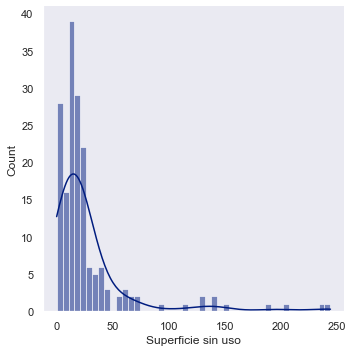

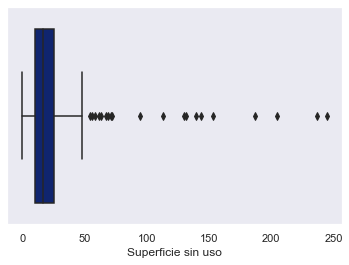

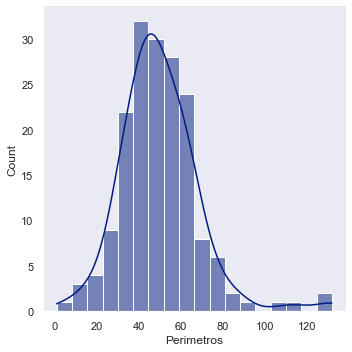

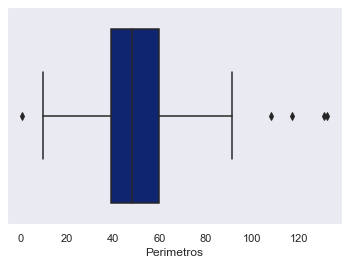

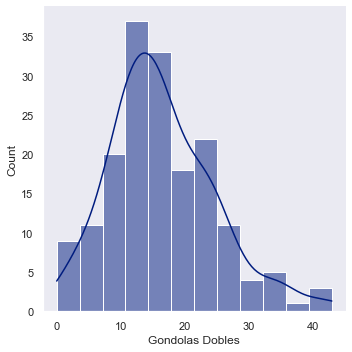

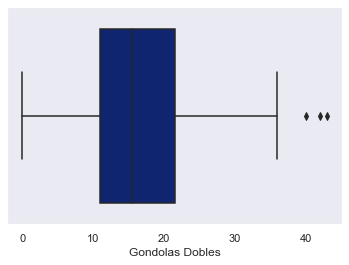

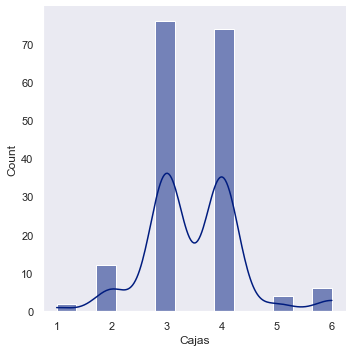

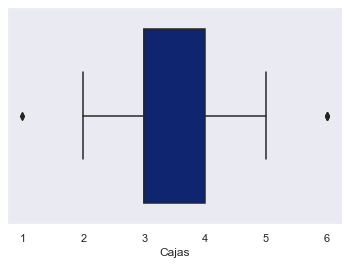

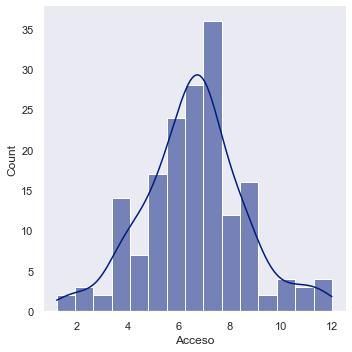

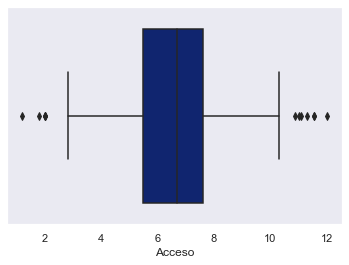

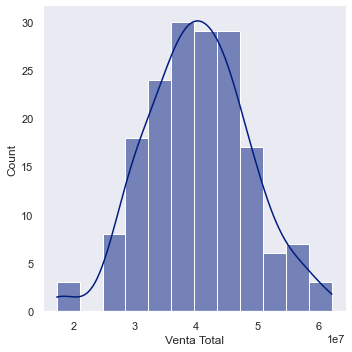

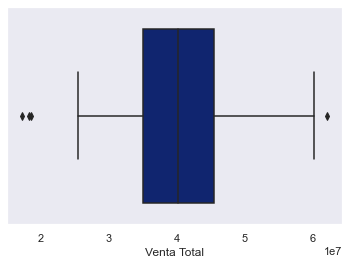

In [223]:
# Distribution plot and regression plot
for i in df_2022.columns:
        sns.displot(data=df_2022,x=i,kde=True)
        plt.show()
        sns.boxplot(data=df_2022,x=i)
        plt.show()

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">4.1. Modeling Data</div>

In [224]:
# Removing outliers above 3 Z-score
df_normal = df_2022[(np.abs(stats.zscore(df_2022))<3).all(axis=1)]

In [225]:
# Defining X
X = df_normal.drop(['Venta Total'],axis=1)
X

,M2 Totales,Bodega,Piso Venta,Superficie sin uso,Perimetros,Gondolas Dobles,Cajas,Acceso
0,142.23,11.04,140.41,2.12,31.0,18.0,2,7.46
1,147.42,6.07,146.12,1.51,31.0,3.0,3,7.59
2,225.49,17.51,198.36,9.62,66.0,6.5,4,4.72
3,300.82,29.78,250.11,20.94,42.0,10.0,3,6.35
4,346.72,35.16,297.91,13.65,53.0,18.5,2,11.00
...,...,...,...,...,...,...,...,...
168,142.06,47.11,119.96,13.54,28.0,6.5,3,6.41
169,296.91,13.70,260.94,13.70,34.0,13.0,3,4.50
170,70.68,3.00,67.49,0.50,15.0,3.0,2,2.00
171,258.75,21.41,220.74,16.74,44.0,14.5,3,4.80


In [226]:
# Defining y
y = df_normal['Venta Total']
y

0      28254452.0
1      28791093.0
2      32436720.0
3      37938611.0
4      42392642.0
          ...    
168    28059777.0
169    37400786.0
170    25420724.0
171    35191755.0
173    31197959.0
Name: Venta Total, Length: 158, dtype: float64

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">4.3. Making Model Prediction</div>

In [227]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [228]:
# Spliting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [229]:
# Importing model
from sklearn.ensemble import RandomForestRegressor

In [230]:
# Creating model
rf = RandomForestRegressor(n_estimators=1000)

In [231]:
# Fitting and Scoring model with train data
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9985019023190039

In [232]:
# Predicting X_test
y_pred = rf.predict(X_test)
y_pred

array([35703185.306, 50390326.858, 34267620.06 , 42858909.382,
       45801695.271, 46375198.289, 33143917.876, 28523570.972,
       37504871.084, 39461246.753, 43650917.026, 38571944.335,
       33521345.799, 35604722.067, 36825434.665, 39841064.811,
       45518569.826, 35158816.902, 30038342.213, 52718371.099,
       28677219.971, 19471827.387, 45125309.553, 41934945.5  ,
       50816965.578, 43984689.598, 31409865.905, 48067491.467,
       32433929.681, 42095088.412, 26603963.381, 33358113.709,
       36116543.323, 32246779.139, 47388589.732, 42956989.29 ,
       47127305.801, 30517008.352, 39468969.543, 30070363.128])

In [233]:
# Scoring model with test data
rf.score(X_test,y_test)

0.9985348791541685

In [234]:
# Importing metrics
from sklearn.metrics import  mean_squared_error,mean_absolute_error

In [235]:
# Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
mae

206491.27809999994

In [236]:
# Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
mse

83444980754.25676

In [237]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

288868.44887293724

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">4.4. Importing Model</div>

In [238]:
# Importing model
import pickle

In [239]:
# Saving model on a pickle file
with open('./model/model.pkl','wb') as f:
        pickle.dump(rf,f)

In [240]:
# Testing model on a pickle file
with open('./model/model.pkl','rb') as f:
    predict_model = pickle.load(f)

In [241]:
# Predicting 
predict_model.predict([[100,0,95,5,11,3,2,2]])

array([25022366.565])

# <div style="text-align: left; background-color: #ffffff4d; backdrop-filter: blur(3x); -webkit-backdrop-filter: blur(3x); font-family:arial; color: black; padding: 5px; line-height: 1 ;border-radius:5px ; font-size:20px">4.5. Importing CSV</div>

In [242]:
# Importing CSV
df_normal.to_csv('./model/data.csv')